In [1]:
import tdmclient.notebook
await tdmclient.notebook.start()

In [2]:

import cv2
import math

import numpy as np
import matplotlib.pyplot as plt
from numpy.core.fromnumeric import size
from matplotlib import colors
from asgiref.sync import sync_to_async #in order to load variables to communicate between sync and async
import numpy.linalg as LA

import optimal_path as op

from robot import Robot
from Map import Map
from Local_navigation import* 
from Mouvement import*
from vision import*
from optimal_path import* 


map_lenght = 1
nb_of_square_by_side = 50
current = 1

global move 
move = False #bool which indicate how our robot is moving (1: avoid an object VS 0: following the optimal path)
kalman_bool = False
old_distance = 0
old_angle = 0
ERR_POS = 3
speed_right = 0
speed_left = 0
#pourcentage_reduc = 1

In [3]:


#VideoCap = vision_initialization()
VideoCap=cv2.VideoCapture(0)


In [4]:
@tdmclient.notebook.sync_var
def motors(l_speed=500, r_speed=500, verbose=False):
    """
    Sets the motor speeds of the Thymio 
    param l_speed: left motor speed
    param r_speed: right motor speed
    param verbose: whether to print status messages or not
    """
    global motor_left_target, motor_right_target
    # Printing the speeds if requested
    if verbose:
        print("\t\t Setting speed : ", l_speed, r_speed)
    motor_left_target = l_speed
    motor_right_target = r_speed

In [5]:
@tdmclient.notebook.sync_var
def proxi():
    """
    Returns the proximity values of the Thymio 
    """
    global prox_horizontal
    return prox_horizontal


In [7]:
#############################
#Test MASK  A LANCER QUE POUR FAIRE DES TESTS SUR LE MASK
#############################

while True:
    ret, frame = VideoCap.read()
    mask, b = mask_map_init(frame)
    
    keyVal = cv2.waitKey(1) & 0xFF
    if keyVal == ord('q'):
        break
    cv2.imshow("mask",mask)
    cv2.imshow("mask B",b)
    #pos_robot, angle = update(frame, 0.5)


KeyboardInterrupt: 

In [6]:
George = Robot()
Lausanne = Map(map_lenght, nb_of_square_by_side)
KF = KalmanFilter(0.1,[0.0,0.0])
KF2 = KalmanFilter(0.1,[0.0,0.0])

taille frame (480, 640, 3)
MAP INITIALISATION
first while
searching for the strart pos
searching for the strart pos
searching for the strart pos
searching for the strart pos
searching for the strart pos
searching for the strart pos
searching for the strart pos
searching for the strart pos
searching for the strart pos
searching for the strart pos
searching for the strart pos
searching for the strart pos
searching for the strart pos
searching for the strart pos
searching for the strart pos
searching for the strart pos
goal (17, 29)
start position (47, 4)
PATH COMPUTATION


True

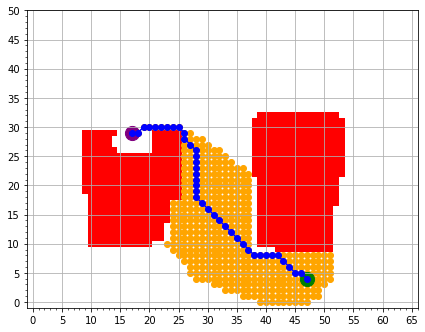

In [7]:
#np.set_printoptions(threshold=sys.maxsize)
####################################
## INIT
####################################
nb_frame_to_take = 10
# Prend une première image
for i in range (nb_frame_to_take): 
    ret, frame = VideoCap.read()
    
print("taille frame", frame.shape)
cv2.imwrite("debut.jpg", frame)

print("MAP INITIALISATION")
# Set the pourcentage value between the nb of pixel and nb of square by side
Lausanne.set_map_lenght(frame)
#print("Pourcentage",Lausanne.get_pourcentage())
# Set the robot goal, position and angle
goal = init_goal(frame, Lausanne.get_pourcentage())
#goal = (50, 40)

# Set pour relancer direct
pos_robot = (-1,-1)
George.set_pos(pos_robot) 
#print("GOAL", goal)

print("first while")
#pos_robot, angle = update(frame, Lausanne.get_pourcentage())  # fonction qui retourne la position angle etc....
 
      #Utiliser au cas où il ne trouve pas la bonne position du premier coup
while (pos_robot[0] <= 0) & (pos_robot[1] <= 0):
    #ret, frame=VideoCap.read()
    #display(frame,1,0,0)
    print("searching for the strart pos")
    ret, frame=VideoCap.read()
    #vs.display (frame, 0, 1, 1, 0, 5, Lausanne.get_pourcentage())
    pos_robot,pos_robot2, angle, bool_mesure = update(frame, Lausanne.get_pourcentage())  # fonction qui retourne la position angle etc....
    #print("Waiting robot position") 

George.set_angle(angle)
George.set_goal(goal)
George.set_start_pos(pos_robot)
George.set_pos(pos_robot)
print ("goal", goal)
print ("start position", pos_robot)

# SET MAP
Lausanne.set_map_lenght(frame)
#print("Lausanna lenght", Lausanne.get_lenght())

# MASK 
mask_bleu, mask_green = mask_map_init(frame)
#cv2.imshow("mask", mask)
cv2.imwrite("masque1.jpg", mask_bleu)
cv2.imwrite("masque2.jpg", mask_green)

# Fin de l'init
Lausanne.init_grid(mask_bleu,mask_green)
grille = Lausanne.get_map()
#cv2.imshow("grid", grille)
cv2.imwrite("grille.jpg", grille)

# OPTIMAL PATH
print("PATH COMPUTATION")
path, visitedNodes = op.path_computation(George.get_start() , George.get_goal() , Lausanne.get_lenght(), grille)

George.set_path(path) 
George.set_visit_nodes(visitedNodes) 

# Display the optimal path
op.display_map(Lausanne.get_lenght(),  grille,  George.get_visit_nodes(), George.get_path(), George.get_start(), George.get_goal())
#print("PATH", George.get_path())

display (frame, 0, 1, 1, 1, George.get_path(), Lausanne.get_pourcentage())
#print("PATH22222", George.get_path())
cv2.imwrite("TOTAL.jpg", frame)

#vision_end(VideoCap)



In [8]:

####################################
## while
####################################

George.set_current(0)
current= 0
kalman_bool = False
print("PATH", George.get_path())
old_distance = 0
old_angle = 0
soon_arrived = False
thresh_indentation = 15
print('START MOUVEMENT')
while True:#(George.get_pos() != George.get_goal()):
    
    # Read the camera
    ret, frame=VideoCap.read()
    
    # Recupere la position et angle --> XAV
    pos_robot, pos_robot2, angle_robot, bool_mesure = update(frame, Lausanne.get_pourcentage())
    print("pos avant kalman", pos_robot)
    print("Pos avant 2", pos_robot2)
    print("angle avant kalman", angle_robot)
    pos = KF.kalmanFilter(bool_mesure, speed_left, speed_right, pos_robot, angle_robot)
    pos2 = KF2.kalmanFilter(bool_mesure, speed_left, speed_right, pos_robot2, angle_robot)
    x = pos2[0]-pos[0]
    y = pos2[1]-pos[1]
    print ("X", x)
    print ("Y", y)
    angle_robot2 = KF.angle_of_vectors_2(x, y, 1, 0)
    print("pos après kalman", pos_robot)
    print("pos2", pos2)
    print("angle après kalman", angle_robot2)
    George.set_pos(pos)
    George.set_angle(angle_robot)
    
    if(current < George.get_path().shape[1]-1):
        current = path_update(pos, ERR_POS, np.transpose(George.get_path())[current], George.get_current())#
        George.set_current(current)
    else:
        print("READY TO PARK")
        motors(0,0)
        break
    
    pos_goal =  np.transpose(George.get_path())[current]
    
    if current > (George.get_path().shape[1] - thresh_indentation) :
        soon_arrived = True
        print('soon arrived')
    
    proximity = proxi()
    
    move = False
        #LOCAL NAVIGATION
    if move and not (soon_arrived):
        #Thymio is avoiding obstacles
        print("OBSTACLLLEEEE")
        speed_l, speed_r, move = avoid_obstacle(prox_horizonta=proximity) 
    else:
        #Thymio is following the optimal path
        speed_l, speed_r, old_distance, old_goal  = move_to_position( pos, angle_robot, pos_goal, old_distance, old_angle)#
        #Thymio is checking if there's an obstacle in front of it
        move = check_cars(prox_horizonta=proximity)
       
    
    speed_right =  speed_r
    speed_left = speed_l
    motors(speed_l, speed_r) 
    
    display (frame, 0, 1, 1, 1, path, Lausanne.get_pourcentage())
    
    # Quit when we press q
    keyVal = cv2.waitKey(1) & 0xFF
    if keyVal == ord('q'):
        motors(0,0)
        break
     
    sleep(0.1)

print("PARKING")


"""
proximity = proxi()

while proxis[2] > parking_treshold

    speed0 = 70
    err_angle = proxis[1]-proxis[3]
    err_dist = proxis[2]
    
    speed_l = speed0 + Kp*err_dist + Kp*err_angle
    speed _r = speed0 + Kp*err_dist - Kp*err_angle
    if(err_dist < min_err_dist)
        motors(0,0)
        print("ARRIVED")
        break
    motors(speed_l, speed_r)
    proximity = proxi()
    
"""
    

PATH [[47 46 45 44 43 42 41 40 39 38 37 36 35 34 33 32 31 30 29 28 28 28 28 28
  28 28 28 28 27 26 26 25 24 23 22 21 20 19 18 17]
 [ 4  5  5  6  7  8  8  8  8  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
  23 24 25 26 27 28 29 30 30 30 30 30 30 30 29 29]]
START MOUVEMENT
pos avant kalman (47, 4)
Pos avant 2 (41, 5)
angle avant kalman 2.984990776607778
MESURE
MESURE
X 0.0
Y 0.0
pos après kalman (47, 4)
pos2 [0. 0.]
angle après kalman 0
-2.900088983158056
pos avant kalman (47, 4)
Pos avant 2 (41, 5)
angle avant kalman 2.9375746739972444
MESURE
MESURE
X -4.0
Y 0.0
pos après kalman (47, 4)
pos2 [27.  3.]
angle après kalman 3.141592653589793
-2.875155864001287
pos avant kalman (47, 4)
Pos avant 2 (41, 6)
angle avant kalman 2.782821983319221
MESURE
MESURE
X -5.0
Y 0.0
pos après kalman (47, 4)
pos2 [36.4  3.9]
angle après kalman 3.141592653589793
-2.7649667381796665
pos avant kalman (47, 4)
Pos avant 2 (42, 7)
angle avant kalman 2.5349875449952664
MESURE
MESURE
X -6.0
Y 1.0000000000000004
pos

pos avant kalman (41, 7)
Pos avant 2 (35, 9)
angle avant kalman 2.8517461636781736
MESURE
MESURE
X -6.0
Y 2.0
pos après kalman (41, 7)
pos2 [34.8  9.1]
angle après kalman 2.819842099193151
-0.1738011190891866
pos avant kalman (41, 7)
Pos avant 2 (35, 9)
angle avant kalman 2.8144945565840005
MESURE
MESURE
X -6.0
Y 2.0
pos après kalman (41, 7)
pos2 [34.8  9.1]
angle après kalman 2.819842099193151
-0.13654951199501353
pos avant kalman (40, 7)
Pos avant 2 (35, 10)
angle avant kalman 2.7672590375822095
MESURE
MESURE
X -6.0
Y 2.0
pos après kalman (40, 7)
pos2 [34.8  9.1]
angle après kalman 2.819842099193151
-0.08931399299322251
pos avant kalman (40, 8)
Pos avant 2 (34, 10)
angle avant kalman 2.7455112120254856
MESURE
MESURE
X -5.0
Y 3.0
pos après kalman (40, 8)
pos2 [34.8 10.1]
angle après kalman 2.601173153319209
next goal plz
-0.25578767274126957
pos avant kalman (40, 8)
Pos avant 2 (34, 10)
angle avant kalman 2.7455112120254856
X -6.0
Y 2.0
pos après kalman (40, 8)
pos2 [33.8 10.1]
angle 

pos avant kalman (33, 13)
Pos avant 2 (29, 17)
angle avant kalman 2.4136026048291446
MESURE
MESURE
X -4.9999999999999964
Y 5.0
pos après kalman (33, 13)
pos2 [28.8 17.2]
angle après kalman 2.3561944901923444
-0.05740811463680018
pos avant kalman (33, 12)
Pos avant 2 (28, 17)
angle avant kalman 2.3779301970341375
MESURE
MESURE
X -3.9999999999999964
Y 4.000000000000002
pos après kalman (33, 12)
pos2 [28.8 17.1]
angle après kalman 2.356194490192344
next goal plz
-0.0347219897619655
pos avant kalman (33, 13)
Pos avant 2 (28, 17)
angle avant kalman 2.356194490192345
MESURE
MESURE
X -4.9999999999999964
Y 5.0
pos après kalman (33, 13)
pos2 [27.8 17.2]
angle après kalman 2.3561944901923444
-0.11575921772081132
pos avant kalman (33, 13)
Pos avant 2 (28, 18)
angle avant kalman 2.356194490192345
MESURE
MESURE
X -4.9999999999999964
Y 4.0
pos après kalman (33, 13)
pos2 [27.8 17.2]
angle après kalman 2.4668517113662403
-4.440892098500626e-16
pos avant kalman (32, 13)
Pos avant 2 (28, 18)
angle avant

pos avant kalman (28, 20)
Pos avant 2 (28, 26)
angle avant kalman 1.6199370612109167
MESURE
MESURE
X -1.0
Y 6.0
pos après kalman (28, 20)
pos2 [27.  26.2]
angle après kalman 1.7359450042095235
next goal plz
-0.04914073441602018
pos avant kalman (28, 20)
Pos avant 2 (27, 26)
angle avant kalman 1.6207547225168393
MESURE
MESURE
X 0.0
Y 6.0
pos après kalman (28, 20)
pos2 [28.  26.2]
angle après kalman 1.5707963267948966
-0.04995839572194272
pos avant kalman (28, 20)
Pos avant 2 (28, 26)
angle avant kalman 1.5874614505088374
MESURE
MESURE
X -1.0
Y 6.0
pos après kalman (28, 20)
pos2 [27.  26.2]
angle après kalman 1.7359450042095235
-0.0166651237139408
PARKING


'\nproximity = proxi()\n\nwhile proxis[2] > parking_treshold\n\n    speed0 = 70\n    err_angle = proxis[1]-proxis[3]\n    err_dist = proxis[2]\n    \n    speed_l = speed0 + Kp*err_dist + Kp*err_angle\n    speed _r = speed0 + Kp*err_dist - Kp*err_angle\n    if(err_dist < min_err_dist)\n        motors(0,0)\n        print("ARRIVED")\n        break\n    motors(speed_l, speed_r)\n    proximity = proxi()\n    \n'

In [9]:
vision_end(VideoCap)

In [9]:
motors(0,0)